Import the modules used in this project

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Import the data scraped from immoweb.

In [60]:
data = pd.read_csv(".\data\output.csv")
data.drop_duplicates("id")
data = data[data['price']>0]
display(data.head())
data["postalCode"]=data["postalCode"].astype(str)

,id,type of property,subtype of property,locality,latitude,longitude,street,province,postalCode,price,...,open fire,terrace,terrace area,garden,garden area,total property area,total land area,number of facades,swimming pool,state of the building
0,10681697,HOUSE,HOUSE,Liege,50.71,5.62,Rue de la Wallonie 2A,Liège,4020,149000,...,False,True,25.0,NaN,NaN,137.0,110.0,2.0,False,good
1,10679325,HOUSE,HOUSE,Vise,50.71,5.62,Rue de la Wallonie 2A,Liège,4600,229000,...,False,True,136.0,NaN,NaN,145.0,184.0,3.0,False,good
2,10680063,HOUSE,BUNGALOW,ROTHEUX-RIMIÈRE,50.52,5.24,Avenue des Ardennes 1/02,Liège,4120,319000,...,True,True,40.0,True,200.0,104.0,543.0,3.0,NaN,just_renovated
3,10680254,HOUSE,VILLA,La Roche-en-Ardenne,50.27,5.45,Rue Simon 46/2,Luxembourg,6980,398000,...,False,True,NaN,True,1193.0,170.0,1193.0,4.0,False,good
4,10679351,HOUSE,VILLA,Vilvoorde,50.89,4.47,Parklaan 59/1,Flemish Brabant,1800,430000,...,False,True,40.0,True,400.0,132.0,623.0,3.0,False,good


In [61]:
#this code shows how messy the locality variable can be:
data[data["postalCode"]=="1000"]["locality"].value_counts()

locality
Bruxelles                231
Brussels City             63
BRUXELLES                 32
Brussels                  20
Brussel                   13
Bruxelles ville            9
Pentagone (Bruxelles)      7
Nord-Est (Bruxelles)       3
Bruxelles  1               3
Bruxelles 1                3
Nord (Bruxelles)           2
Louise (Bruxelles)         1
Pentagone (Brussel)        1
Ixelles                    1
Name: count, dtype: int64

In [62]:
# import the gemeenten en postcode info from https://www.metatopos.eu/belgcombiN.html
post_code=pd.read_excel("data\Belgiesche gemeenten met postcodes.xlsx")
post_code.head()

,Post-,Gemeente,Deelgemeente,Provincie,Inwoners,Facili-,Vertaling naam
0,code,NaN,NaN,NaN,NaN,teiten,(deel)gemeente
1,1000,Brussel,NaN,Brussels Hoofdstedelijk Gewest,178552.0,N+F,Bruxelles
2,1000,Bruxelles,NaN,Brussels Hoofdstedelijk Gewest,NaN,N+F,Brussel
3,1030,Schaarbeek,NaN,Brussels Hoofdstedelijk Gewest,132590.0,N+F,Schaerbeek
4,1030,Schaerbeek,NaN,Brussels Hoofdstedelijk Gewest,NaN,N+F,Schaarbeek


Clean up the gemeente info first:
- remove deelgemeente, inwoners, facili-, vertaling naam coloums
- drop nan
- remove the french translation
- change the type of Postalcode to int
- change Brussels Hoofdstedelijk Gewest to Brussel


In [63]:
post_code.drop(columns=['Deelgemeente','Facili-',"Inwoners",'Vertaling naam'],inplace=True)
post_code.columns = ["postalCode","Gemeente","Province"]
post_code.dropna(subset="postalCode")
post_code.drop_duplicates(subset="postalCode",keep='first',inplace =True)
post_code["Province"].replace("Brussels Hoofdstedelijk Gewest","Brussel",inplace=True)
post_code["postalCode"]=post_code["postalCode"].astype(str)

Clean the "locality" and "province" columns of data , by mapping it to the correct ones in post_code

In [64]:
#I spend a lot of time on this.
# Wrong approach: iterate through the data, assign the right value of locality from post_code["Gemeente"]
# Right way to do it: name the series in post_code with the same name, and merge two dataframes!!!
data = data.merge(post_code,how="left",on="postalCode")
data = data.drop(columns=["province"])
data

,id,type of property,subtype of property,locality,latitude,longitude,street,postalCode,price,type of sale,...,terrace area,garden,garden area,total property area,total land area,number of facades,swimming pool,state of the building,Gemeente,Province
0,10681697,HOUSE,HOUSE,Liege,50.71,5.62,Rue de la Wallonie 2A,4020,149000,residential_sale,...,25.0,NaN,NaN,137.0,110.0,2.0,False,good,Liège,Liège
1,10679325,HOUSE,HOUSE,Vise,50.71,5.62,Rue de la Wallonie 2A,4600,229000,residential_sale,...,136.0,NaN,NaN,145.0,184.0,3.0,False,good,Visé,Liège
2,10680063,HOUSE,BUNGALOW,ROTHEUX-RIMIÈRE,50.52,5.24,Avenue des Ardennes 1/02,4120,319000,residential_sale,...,40.0,True,200.0,104.0,543.0,3.0,NaN,just_renovated,Neupré,Liège
3,10680254,HOUSE,VILLA,La Roche-en-Ardenne,50.27,5.45,Rue Simon 46/2,6980,398000,residential_sale,...,NaN,True,1193.0,170.0,1193.0,4.0,False,good,La Roche-en-Ardenne,Luxembourg
4,10679351,HOUSE,VILLA,Vilvoorde,50.89,4.47,Parklaan 59/1,1800,430000,residential_sale,...,40.0,True,400.0,132.0,623.0,3.0,False,good,Vilvoorde,Vlaams-Brabant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16790,10532799,APARTMENT,APARTMENT,Leuven,50.88,4.71,Bondgenotenlaan 138,3000,505000,residential_sale,...,NaN,NaN,NaN,124.0,0.0,0.0,NaN,0,Leuven,Vlaams-Brabant
16791,10444539,APARTMENT,PENTHOUSE,Mechelen,51.06,3.71,Nieuwewandeling 62,2800,625000,residential_sale,...,NaN,NaN,NaN,109.0,0.0,NaN,False,0,Mechelen,Antwerpen
16792,10611190,APARTMENT,APARTMENT,Nieuwpoort,51.15,2.72,Artanlaan 2,8620,650000,residential_sale,...,NaN,NaN,NaN,78.0,NaN,NaN,False,0,Nieuwpoort,West-Vlaanderen
16793,10650583,APARTMENT,APARTMENT,Blankenberge,51.24,3.22,Pathoekeweg 120 B 1.01,8370,335000,residential_sale,...,NaN,NaN,NaN,102.0,NaN,NaN,False,0,Blankenberge,West-Vlaanderen


Now the cleaning of data starts
- replace NaN with the right value

In [65]:
#fill the nan with false in the following columns
for column in ["furnished","open fire","terrace","garden","swimming pool"]:
    data.loc[:,column]=data[column].fillna(False)
#fill the nan with o in the following columns:
for column in ["terrace area","garden area","total land area","number of facades"]:
    data.loc[:,column]=data[column].fillna(0)
data = data.dropna(subset=["Province",'total property area'])
print(data.shape)
display(data.head())

(15964, 26)


,id,type of property,subtype of property,locality,latitude,longitude,street,postalCode,price,type of sale,...,terrace area,garden,garden area,total property area,total land area,number of facades,swimming pool,state of the building,Gemeente,Province
0,10681697,HOUSE,HOUSE,Liege,50.71,5.62,Rue de la Wallonie 2A,4020,149000,residential_sale,...,25.0,False,0.0,137.0,110.0,2.0,False,good,Liège,Liège
1,10679325,HOUSE,HOUSE,Vise,50.71,5.62,Rue de la Wallonie 2A,4600,229000,residential_sale,...,136.0,False,0.0,145.0,184.0,3.0,False,good,Visé,Liège
2,10680063,HOUSE,BUNGALOW,ROTHEUX-RIMIÈRE,50.52,5.24,Avenue des Ardennes 1/02,4120,319000,residential_sale,...,40.0,True,200.0,104.0,543.0,3.0,False,just_renovated,Neupré,Liège
3,10680254,HOUSE,VILLA,La Roche-en-Ardenne,50.27,5.45,Rue Simon 46/2,6980,398000,residential_sale,...,0.0,True,1193.0,170.0,1193.0,4.0,False,good,La Roche-en-Ardenne,Luxembourg
4,10679351,HOUSE,VILLA,Vilvoorde,50.89,4.47,Parklaan 59/1,1800,430000,residential_sale,...,40.0,True,400.0,132.0,623.0,3.0,False,good,Vilvoorde,Vlaams-Brabant


Drop the duplicates with the same coordinates, price and size:


In [66]:
#first filter out the duplicates in the list
condition = data[["latitude","longitude","street","price","total property area"]].duplicated(keep=False)
#pass the returned boolean to data, get the index of the duplicates
data = data.drop(data[condition].index)
display(data)

,id,type of property,subtype of property,locality,latitude,longitude,street,postalCode,price,type of sale,...,terrace area,garden,garden area,total property area,total land area,number of facades,swimming pool,state of the building,Gemeente,Province
0,10681697,HOUSE,HOUSE,Liege,50.71,5.62,Rue de la Wallonie 2A,4020,149000,residential_sale,...,25.0,False,0.0,137.0,110.0,2.0,False,good,Liège,Liège
1,10679325,HOUSE,HOUSE,Vise,50.71,5.62,Rue de la Wallonie 2A,4600,229000,residential_sale,...,136.0,False,0.0,145.0,184.0,3.0,False,good,Visé,Liège
2,10680063,HOUSE,BUNGALOW,ROTHEUX-RIMIÈRE,50.52,5.24,Avenue des Ardennes 1/02,4120,319000,residential_sale,...,40.0,True,200.0,104.0,543.0,3.0,False,just_renovated,Neupré,Liège
3,10680254,HOUSE,VILLA,La Roche-en-Ardenne,50.27,5.45,Rue Simon 46/2,6980,398000,residential_sale,...,0.0,True,1193.0,170.0,1193.0,4.0,False,good,La Roche-en-Ardenne,Luxembourg
4,10679351,HOUSE,VILLA,Vilvoorde,50.89,4.47,Parklaan 59/1,1800,430000,residential_sale,...,40.0,True,400.0,132.0,623.0,3.0,False,good,Vilvoorde,Vlaams-Brabant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16790,10532799,APARTMENT,APARTMENT,Leuven,50.88,4.71,Bondgenotenlaan 138,3000,505000,residential_sale,...,0.0,False,0.0,124.0,0.0,0.0,False,0,Leuven,Vlaams-Brabant
16791,10444539,APARTMENT,PENTHOUSE,Mechelen,51.06,3.71,Nieuwewandeling 62,2800,625000,residential_sale,...,0.0,False,0.0,109.0,0.0,0.0,False,0,Mechelen,Antwerpen
16792,10611190,APARTMENT,APARTMENT,Nieuwpoort,51.15,2.72,Artanlaan 2,8620,650000,residential_sale,...,0.0,False,0.0,78.0,0.0,0.0,False,0,Nieuwpoort,West-Vlaanderen
16793,10650583,APARTMENT,APARTMENT,Blankenberge,51.24,3.22,Pathoekeweg 120 B 1.01,8370,335000,residential_sale,...,0.0,False,0.0,102.0,0.0,0.0,False,0,Blankenberge,West-Vlaanderen


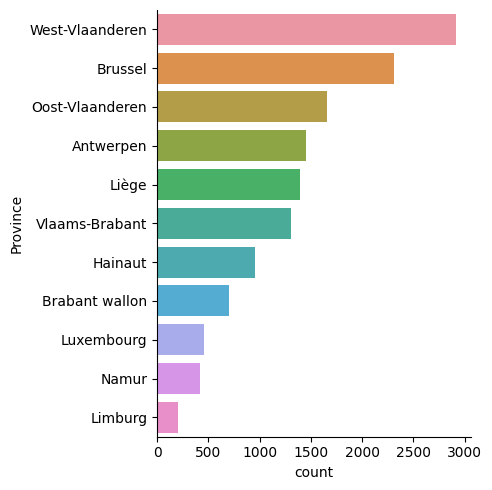

In [67]:
#here we try to see the distribution per province
#list them descending by count
sns.catplot(kind="count",data =data, y="Province",order = data.value_counts("Province").index)
plt.show()